In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mob_data = pd.read_csv('/content/mobile_price_classification.csv')
mob_data.dtypes
#univariate
description = mob_data.describe()

<Axes: >

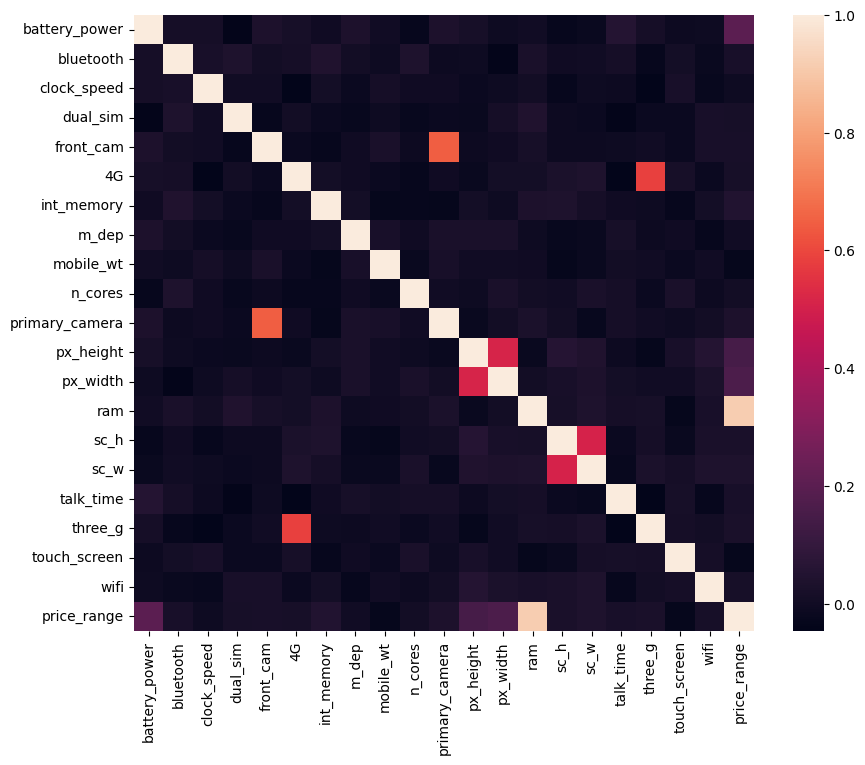

In [3]:
#multivariate
correlation_mat = mob_data.corr()
plt.figure(figsize = [10,8])
sns.heatmap(correlation_mat)

<Axes: xlabel='px_height', ylabel='px_width'>

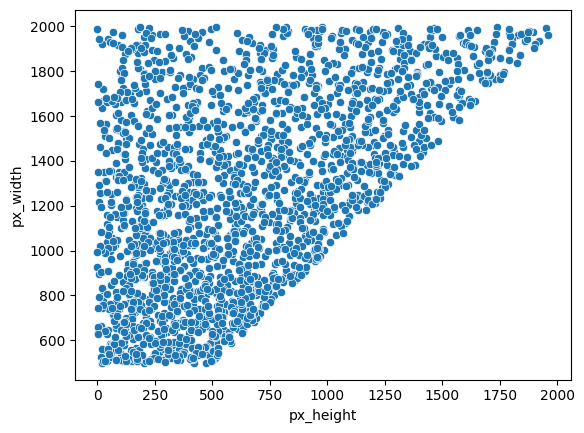

In [10]:
#we see relation between px height and width
sns.scatterplot(x=mob_data['px_height'], y=mob_data['px_width'])

In [11]:
#converting height and weidth to inches
mob_data['sc_h'] = mob_data['sc_h'] * 0.393701
mob_data['sc_w'] = mob_data['sc_w'] * 0.393701

In [12]:
#feature engineering
mob_data['screen_size'] = np.sqrt(np.square(mob_data['sc_h']) + np.square(mob_data['sc_w']))
mob_data['resolution'] = (mob_data['px_height'] * mob_data['px_width'])


<Axes: xlabel='price_range', ylabel='resolution'>

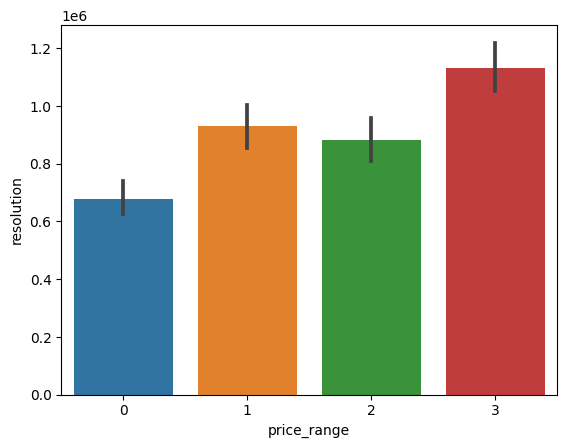

In [13]:
#removing old variable
dcol = ['sc_h','sc_w','px_height','px_width']
mob_data.drop(dcol,axis = 1,inplace = True)
sns.barplot(x = mob_data['price_range'], y = mob_data['screen_size'])
sns.barplot(x = mob_data['price_range'], y = mob_data['resolution'])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

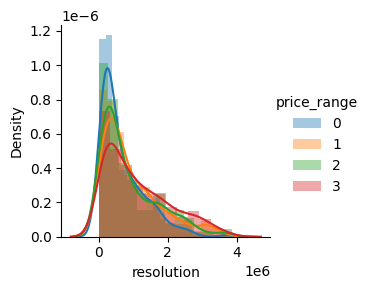

In [16]:
sns.FacetGrid(mob_data,hue = 'price_range').map(sns.distplot,'resolution').add_legend();

{'whiskers': [<matplotlib.lines.Line2D at 0x7b01c9dd52a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b01c9dd5840>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b01c9d9fd60>],
 'medians': [<matplotlib.lines.Line2D at 0x7b01c9dd5d80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b01c9dd6020>],
 'means': []}

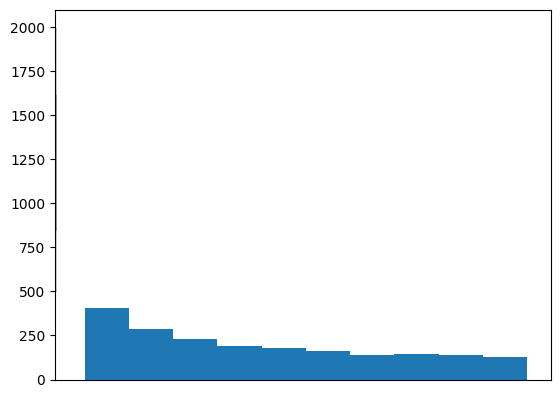

In [17]:
#sns.pairplot(mob_data.iloc[:,[9,10,11,12,13,14,15,20]])
plt.hist(np.square(mob_data['battery_power']))
plt.boxplot(mob_data['battery_power'])


In [24]:
#for col in mob_data.columns:
    #pd.pivot_table(mob_data, values = col, index = 'price_range')


mob_data.value_counts()
x = list(mob_data.columns)
y = x.pop(16)

def scale(a):
    return (a - np.min(a))/(np.max(a) - np.min(a))

norm_data = mob_data[x].apply(lambda a: scale(a))
norm_data[y] = mob_data[y]

from sklearn.model_selection import train_test_split
train,test = train_test_split(norm_data,train_size = 0.8,test_size = 0.2,stratify = mob_data['price_range'])


train['price_range'].value_counts()
test['price_range'].value_counts()

def built_model(algo,pre):
    algo.fit(train[pre],train[y])
    pred = algo.predict(test[pre])
    print(accuracy_score(test[y],pred))

0.8575
0.8725
0.885
0.91


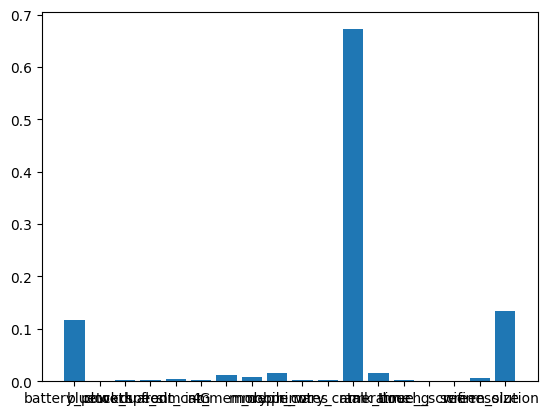

In [25]:
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion = 'entropy')
built_model(model1,x)#86.25%
score = model1.feature_importances_
plt.bar(x,score)
filter_x = ['battery_power','ram','resolution']
built_model(model1,filter_x)#89.5%

from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 200)
built_model(model2,x)#87.75
built_model(model2,filter_x)#91%

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

([<matplotlib.axis.XTick at 0x7b01c81d8a30>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

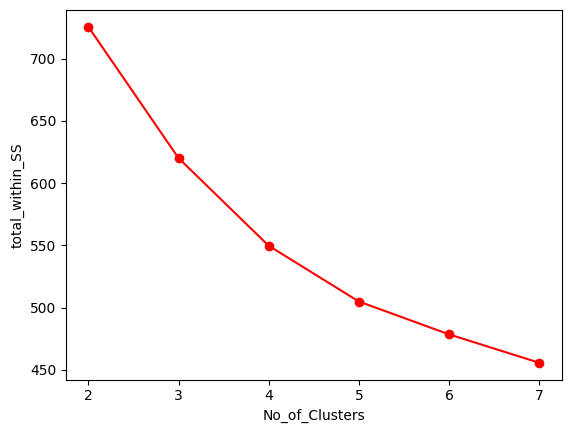

In [26]:
#insigths from above features
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

df_fill_x = norm_data[filter_x]
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_fill_x)
    WSS = [] # variable for storing within sum of squares for each cluster
    for j in range(i):
        WSS.append(sum(cdist(df_fill_x.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_fill_x.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [27]:
#building model for cluster 4
k_model = KMeans(n_clusters = 4)
k_model.fit(df_fill_x)
k_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 2, 0, 1], dtype=int32)

In [38]:
#create df with original values
clus_df = mob_data[filter_x]
clus_df['clusters'] = k_model.labels_
pd.pivot_table(clus_df, values = ['battery_power','ram','resolution'], index = 'clusters')
#df_fill_x.drop('clusters',axis = 1,inplace = True)



<ipython-input-38-a7d91896241b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus_df['clusters'] = k_model.labels_


,battery_power,ram,resolution
clusters,,,
0,1648.683258,1131.631222,1.020647e+06
1,829.464427,3008.381423,9.096306e+05
2,1616.676749,3047.166352,8.464558e+05
3,905.139579,1174.097514,8.629944e+05
